<a href="https://colab.research.google.com/github/ManelSoengas/Mistral_OCR/blob/main/Mistral_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install mistralai

In [ ]:
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

In [8]:
from mistralai import Mistral

api_key = "Api_key"
client = Mistral(api_key=api_key)

In [9]:
from pathlib import Path

pdf_file = Path("document.pdf")
assert pdf_file.is_file()

{
    "pages": [
        {
            "index": 0,
            "markdown": "![img-0.jpeg](img-0.jpeg)\n\nMINISTERIO\nDE ASUNTOS ECON\u00d3MICOS\nY TRANSFORMACI\u00d3N DIGITAL\n\nSECRETAR\u00cdA DE ESTADO DE DIGITALIZACI\u00d3N E INTELIGENCIA ARTIFICIAL\n\nDIRECCI\u00d3N GENERAL DE DIGITALIZACI\u00d3N E INTELIGENCIA ARTIFICIAL\nSUBDIRECCI\u00d3N GENERAL DE INTELIGENCIA ARTIFICIAL Y\nTECNOLOG\u00cdAS HABILITADORAS DIGITALES\n![img-1.jpeg](img-1.jpeg)\n\n# El Reglamento Europeo de IA, en resumen \n\n## Introducci\u00f3n\n\nEl Reglamento Europeo de Inteligencia artificial (AIA, por Artificial Intelligence Act) busca regular los usos de la Inteligencia Artificial para limitar los riesgos que de ellos se derivan.\n\nSu \u00e1mbito de aplicaci\u00f3n se extiende a: proveedores de sistemas de IA que se pongan en servicio o comercialicen dentro de la UE o cuya salida se utilice en la UE, independientemente de su origen; y a usuarios de los mismos, considerando usuarios a quienes explotan esos s
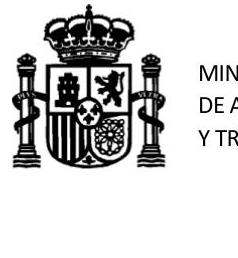
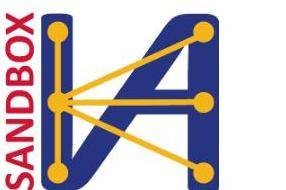
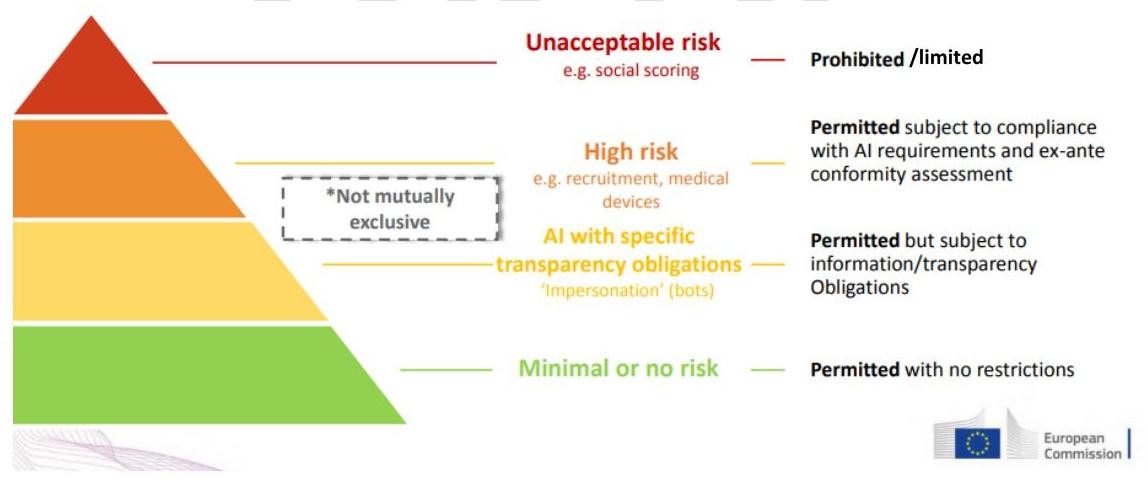
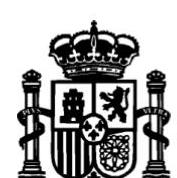
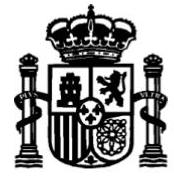

<ipython-input-10-793982fc17e2>:16: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(pdf_response.json())


In [10]:
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

response_dict = json.loads(pdf_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

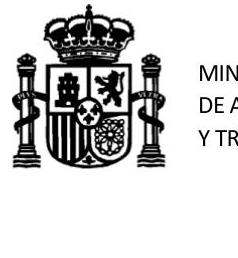

MINISTERIO
DE ASUNTOS ECONÓMICOS
Y TRANSFORMACIÓN DIGITAL

SECRETARÍA DE ESTADO DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL

DIRECCIÓN GENERAL DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL
SUBDIRECCIÓN GENERAL DE INTELIGENCIA ARTIFICIAL Y
TECNOLOGÍAS HABILITADORAS DIGITALES
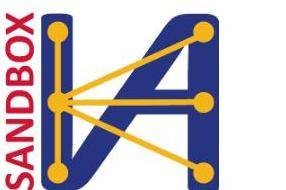

# El Reglamento Europeo de IA, en resumen 

## Introducción

El Reglamento Europeo de Inteligencia artificial (AIA, por Artificial Intelligence Act) busca regular los usos de la Inteligencia Artificial para limitar los riesgos que de ellos se derivan.

Su ámbito de aplicación se extiende a: proveedores de sistemas de IA que se pongan en servicio o comercialicen dentro de la UE o cuya salida se utilice en la UE, independientemente de su origen; y a usuarios de los mismos, considerando usuarios a quienes explotan esos sistemas, y no a los afectados.

El reglamento no es aplicable a autoridades públicas de terceros países ni a organizaciones internacionales cuando unos utilicen sistemas IA en el ámbito de la cooperación policial o judicial con la UE o sus EEMM. Tampoco se aplica a los sistemas de uso militar o utilizados en el contexto de la seguridad nacional, ni a los utilizados con el solo propósito de la investigación y el desarrollo científico.

El Reglamento define Sistema de Inteligencia Artificial como aquel que opera con elementos de autonomía y que, basándose en datos y entradas obtenidos de humanos o máquinas, infiere como alcanzar unos objetivos propuestos, usando para ello técnicas basadas en el aprendizaje-máquina o en lógica y conocimiento, y genera como salida contenidos, predicciones, recomendaciones o decisiones que influyen en el entorno con el que el sistema interactúa. El Reglamento establece una jerarquía de riesgos en función del uso de la IA y sobre las categorías detectadas, establece una serie de obligaciones.
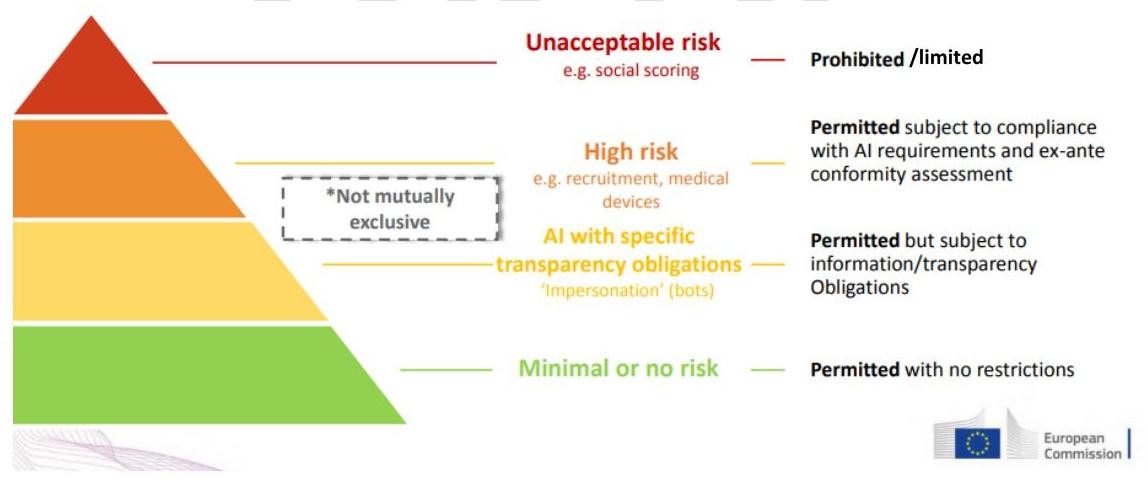

El Reglamento dedica gran parte de su articulado a regular los sistemas de alto riesgo, que divide en dos grandes grupos: Por un lado, mediante un análisis de riesgos se ha identificado un conjunto de familias de sistemas de IA que pueden considerarse de alto riesgo si su salida es relevante respecto a una acción o decisión que pueda presentar un riesgo a la salud, la seguridad o los derechos fundamentales.

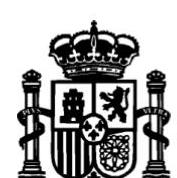

MINISTERIO
DE ASUNTOS ECONÓMICOS
Y TRANSFORMACIÓN DIGITAL

SECRETARÍA DE ESTADO DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL
DIRECCIÓN GENERAL DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL SUBDIRECCIÓN GENERAL DE INTELIGENCIA ARTIFICIAL Y TECNOLOGÍAS HABILITADORAS DIGITALES

El Reglamento enumera y describe este conjunto, que incluye, entre otros, sistemas de identificación biométrica, de protección de infraestructuras críticas, de selección y promoción de personal, de utilización en fronteras, o los usados por las Fuerzas y Cuerpos de Seguridad del Estado o la Administración de Justicia. La Comisión puede actualizar esta lista mediante un acto delegado.

Por otro lado, existen productos que ya están regulados por normativa armonizada de la UE, y que bajo esa normativa están sujetos a evaluación de conformidad. Hay un conjunto limitado de familias de estos productos, que incluye entre otros los dispositivos médicos, los trenes o la maquinaria. Un sistema IA que constituya uno de estos productos, o constituya un componente de seguridad de uno de estos productos, estará sujeto a su correspondiente normativa armonizada.

El Reglamento define varias entidades de supervisión:
Existirán al menos una autoridad nacional notificante y al menos una autoridad de supervisión de mercado como autoridades nacionales competentes para los propósitos del Reglamento.

Las autoridades de supervisión de mercado monitorizarán el correcto funcionamiento, ya en mercado, de sistemas de IA de alto riesgo, identificando riesgos sobrevenidos, incidentes u otras situaciones que exijan tomar medidas sobre los sistemas de IA de alto riesgo.

En el esquema de certificación de productos que propone el Reglamento, una autoridad notificante habilita a organismos de evaluación de conformidad para hacer las evaluaciones de conformidad en materia de IA a productos que quieran comercializar o poner en funcionamiento los proveedores.

Los sistemas de IA regulados por su propia normativa (segundo grupo de los antes descritos) estarán supervisados por la autoridad de supervisión designada en esa normativa.

Para el caso de sistemas de identificación biométrica utilizados para fuerzas y cuerpos de seguridad del estado, migración y administración de justicia, las autoridades de supervisión serán, o bien las autoridades nacionales de supervisar las actividades de seguridad, migración y asilo, o bien la agencia de protección de datos.

A nivel europeo, se constituirá un Comité Europeo de Inteligencia Artificial, donde participará un representante de cada Estado miembro. El Comité orientará sobre la implementación del reglamento, elaborará guías y establecerá las reglas básicas para elaborar sandboxes.

# Estructura General 

Título I: Disposiciones generales (art.1)
Título II: Prácticas prohibidas (art.5)
Título III: Sistemas de alto riesgo (art.6)

1. Clasificación (art.6)
2. Requisitos (art.8)

Gestión de riesgos (art.9)
Datos y su gobernanza (art.10)
Documentación técnica (art.11)
Registros de operación (art.12)
Transparencia (art.13)
Supervisión (art.14)
Precisión, robustez y ciberseguridad (art.15)
3. Obligaciones de proveedores, usuarios y otros (art.16)
4. Autoridades notificantes y entidades notificadas (art.30)
5. Normas y conformidad (art. 40)

Título IV: Obligaciones de transparencia (art.52)
Título V: Medidas para fomentar la innovación (art.53)
Título VI: Gobernanza (art.56)

- Consejo Europeo de IA
- Directrices de la Comisión
- Autoridades nacionales

Título VII: Base de datos europea de sistemas de alto riesgo (art.60)
Título VIII: Monitorización post-comercialización (art.61-68)
Título IX: Códigos de conducta (art.69)
Título X: Confidencialidad (art.70)
Título XI: Delegación de poderes y procedimientos del comité (art.73)
Título XII: Disposiciones finales (art.75-85)

MINISTERIO DE ASUNTOS ECONÓMICOS Y TRANSFORMACIÓN DIGITAL

SECRETARÍA DE ESTADO DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL

DIRECCIÓN GENERAL DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL SUBDIRECCIÓN GENERAL DE INTELIGENCIA ARTIFICIAL Y TECNOLOGÍAS HABILITADORAS DIGITALES

# Título I - Disposiciones Generales 

Este título regula el objetivo del Reglamento. El Reglamento incluye las reglas para poner en marcha o mercado sistemas de IA en la Unión Europea, prohibe diversas prácticas de inteligencia artificial, impone requisitos a sistemas de IA de alto riesgo y obligaciones a los operadores relacionados con ese sistema, impone reglas de transparencia para ciertos sistemas de IA, establece reglas para la monitorización y la vigilancia de mercado, y finalmente introduce medidas para la innovación.

Este título introduce un número importante de definiciones siendo estas de particular interés:

- Sistema de inteligencia artificial: aquel que opera con elementos de autonomía y que, basándose en datos y entradas obtenidos de humanos o máquinas, infiere cómo alcanzar unos objetivos propuestos, usando para ello técnicas basadas en el aprendizaje-máquina o en lógica y conocimiento, y genera como salida contenidos, predicciones, recomendaciones o decisiones que influyen en el entorno con el que el sistema interactúa
- Proveedor: Persona física o jurídica o entidad pública que desarrolla o para quien se desarrolla un sistema de IA y lo pone en servicio o lo comercializa bajo su nombre o marca, mediando un pago o no.
- Usuario: Persona física o jurídica, pública o privada, bajo cuya autoridad se utilice el sistema.

El Reglamento se aplica a:

- Proveedores que comercialicen o utilicen sistemas IA en la Unión, dondequiera que esos proveedores estén presentes.
- Proveedores y usuarios de terceros países cuyos sistemas produzcan resultados que se utilicen en la Unión.
- Usuarios físicamente presentes o establecidos en la UE.
- Proveedores de estos sistemas y sus representantes autorizados, I importadores y distribuidores.


## Título la - Sistemas IA de propósito general

Los sistemas de IA de propósito general (GPAIS) son sistemas de IA que no tienen un propósito previsto inicial, pero que pueden ser entrenados o modificados para cumplir un propósito que podría convertirlos en sistemas de alto riesgo. Por tanto, deberán cumplir ciertos requisitos para que todos los actores de la cadena puedan cumplir a su vez con los requisitos del Reglamento.

Estos requisitos serán los que se aplican a los Sistemas de Inteligencia Artificial de Alto Riesgo, pero adaptados a los GPAIS mediante un acto de ejecución de la Comisión Europea que seguirá a la promulgación del Reglamento.

Los GPAIS quedarán libres de esos requisitos cuando el proveedor excluya explícitamente en su documentación todo uso de alto riesgo. Si este proveedor detecta o es informado de mal uso, tendrá que tomar las medidas necesarias.

## Título II - Sistemas de IA prohibidos

Se prohíben los siguientes sistemas de IA:
Los que desplieguen técnicas subliminales con el objetivo de distorsionar el comportamiento de una persona de manera que pueda causarle daños físicos o psicológicos a él o a otros.

Los que exploten vulnerabilidades de un grupo específico de personas por su edad, discapacidad o situación social o económica de forma que distorsionen el comportamiento de estas personas y probablemente les causen daños a ellas o a otras.

Sistemas de IA que elaboren perfiles de personas según su comportamiento, creando un "baremo social" que pueda resultar en que personas o grupos reciban un trato desproporcionadamente desfavorable al comportamiento observado, o en un trato desfavorable en un contexto que no es aquél donde ser recogieron los datos.

Se prohíbe el uso para aplicaciones policiales o de orden público de la identificación biométrica en tiempo real en lugares accesibles al público por parte de las fuerzas y cuerpos de seguridad, o en su nombre, salvo en estos casos: búsqueda de víctimas potenciales de delitos; prevención de amenazas específicas y sustanciales sobre infraestructuras críticas o sobre personas físicas; prevención de ataques terroristas; y persecución de crímenes punibles con más de cinco años de privación de libertad. Antes se valorará la probabilidad y escala del daño posible sin esos sistemas y del daño que esos podrían ocasionar; mediará autorización judicial o administrativa; y se impondrán limitaciones temporales, geográficas y personales. Fuera de estos casos, la identificación biométrica también está sujeta al RGPD 2016/679 y la Directiva de tratamiento de datos personales por las autoridades 2016/680.

# Título III - Sistemas de IA de Alto Riesgo (HRAIS). 

## Cap. 1 Clasificación de sistemas IA de alto riesgo

Son sistemas IA de alto riesgo:

1. Implementaciones con IA de productos o componentes de seguridad de productos que ya estén cubiertos por legislación europea armonizada, y que por tanto estén sujetos a evaluación de conformidad por parte de un tercero (como por ejemplo, dispositivos médicos, ferrocarriles, aviones o maquinaria). Estas normas armonizadas se enumeran en el Anexo II del Reglamento.
2. Los que enumera el Anexo III, que los clasifica en las categorías que se enumeran a continuación, cuando la salida que producen sea relevante en una decisión con posible riesgo sobre la salud, la seguridad o los derechos fundamentales.
a. Sistemas de identificación biométrica (los que identifiquen personas sin su participación activa, recordando la prohibición existente para las fuerzas y cuerpos de seguridad mencionada antes.
b. Gestión de infraestructuras críticas (como el tráfico, la electricidad o el agua).
c. Educación y formación profesional (como gestión del acceso a la educación o planificación del desarrollo académico).
d. Selección de personal y gestión de las relaciones laborales.
e. Gestión del acceso de las personas a servicios esenciales públicos y privados (como beneficios sociales, servicios de emergencia, crédito o seguros).
f. Actividades de fuerzas y cuerpos de seguridad (como valoración de pruebas o de sospechosos).
g. Migración, asilo y control de fronteras (como polígrafos, o valoración de solicitudes).
h. Administración de justicia y procesos democráticos

La Comisión tiene una capacidad limitada para añadir o retirar sistemas de estas categorías.

## Cap. 2 Requisitos de sistemas de IA de alto riesgo

Se impone una serie de exigencias que los proveedores de sistemas de alto riesgo deben cumplir:

- Se contará con un sistema de gestión de riesgos para el sistema de IA de alto riesgo, que contemple, en particular, los riesgos sobre la salud, seguridad y derechos fundamentales relacionados con su propósito.
- Se establecerá una gobernanza y gestión de los datos de entrenamiento y prueba, asegurando buenas prácticas en su diseño, recolección y preparación, asegurando su relevancia y corrección y sus apropiadas propiedades estadísticas, evitando sesgos que afecten negativamente a las personas.

- Los sistemas irán acompañados de documentación técnica actualizada, que demuestre que se cumplen los requisitos exigidos. Se especifica un contenido mínimo, que la Comisión puede enmendar.
- Los sistemas tomarán automáticamente registros de actividad del sistema.
- Se aportará información a los usuarios sobre las capacidades del sistema, sus requisitos de equipamiento, su ámbito de aplicación, su nivel de precisión, las condiciones de utilización que pueden implicar riesgos, los sistemas para supervisión humana, etc.
- Los sistemas permitirán la supervisión por personas durante su uso para minimizar los riesgos a la salud, seguridad y derechos fundamentales, en particular de los riesgos residuales tras la aplicación de medidas de mitigación. Los usuarios podrán monitorizar los sistemas e interpretar sus salidas. Para identificación biométrica remota, la salida requerirá verificación por una persona física, posiblemente dos.
- Los sistemas proporcionaran un nivel adecuado de precisión, robustez y ciberseguridad, que se declarará en la documentación que los acompaña. Se diseñarán con tolerancia a errores o inconsistencias en su interacción con su entorno, en particularidad con personas u otros sistemas. Incorporarán medidas de ciberseguridad apropiadas y proporcionadas a sus circunstancias, en particular de protección contra la manipulación de los datos de entrenamiento.


# Cap. 3 Obligaciones de los proveedores y usuarios y otras terceras partes 

Dado que en la puesta en marcha, comercialización y funcionamiento de los HRAIS intervienen varias partes, se establecen obligaciones a cada una:

Los proveedores tienen la mayor parte de las obligaciones. Cumplirán los requisitos y superarán las pruebas de conformidad; contarán con un sistema de gestión de calidad documentado y mantenido y mantendrán documentación completa del sistema; custodiarán los registros del sistema que estén bajo su control; y colaborarán con las autoridades registrando el sistema, demostrando el cumplimiento de los requisitos cuando se les solicite, y notificando los incumplimientos y riesgos que detecten y las acciones correctivas que se emprendan en consecuencia.

Importadores y distribuidores deben conservar la documentación técnica, asegurarse de que los productos han atravesado la evaluación de conformidad y cuentan con el marcado CE y que colaboran con las autoridades cuando sea necesario. Los importadores se asegurarán de que exista en la UE un representante autorizado del proveedor.

Los usuarios deben practicar las labores de supervisión humana, monitorizar los sistemas, guardar registros y cooperarán con las autoridades.

Modificar sustancialmente un HRAIS existente, configurar un GPAIS de forma que se convierta en HRAIS, o cambiar de titularidad un HRAIS se considera como crear un nuevo HRAIS, y genera las obligaciones mencionadas.

## Capítulo 4 - Autoridades notificantes y cuerpos notificados

Cada EEMM debe designar una autoridad notificante responsable de establecer y poner en práctica los procedimientos para evaluar, designar, notificar y monitorizar los organismos de evaluación de conformidad. Esta autoridad puede delegar la evaluación y monitorización en una organización de acreditación. Los organismos notificados podrán verificar la conformidad con el Reglamento de los HRAIS.

Un organismo de evaluación de conformidad que quiera ser notificado puede obtener certificación de cumplir los requisitos de un organismo nacional de acreditación, y dirigir su solicitud y documentación a la autoridad notificante. Esta última notificará a la Comisión que ha satisfecho los requisitos.

MINISTERIO
DE ASUNTOS ECONÓMICOS
Y TRANSFORMACIÓN DIGITAL

SECRETARÍA DE ESTADO DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL

DIFECCIÓN GENERAL DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL SUBDIFECCIÓN GENERAL DE INTELIGENCIA ARTIFICIAL Y TECNOLOGÍAS HABILITADORAS DIGITALES

# Capítulo 5 - Estándares, evaluaciones de conformidad, certificados y registro 

Si un HRAIS o un GPAIS es conforme a normas técnicas armonizadas publicadas en el DOUE, se presumirá que es conforme a los requisitos del Reglamento para RAIS o GPAIS, respectivamente.

Si no existen esta normas o son insuficientes, la Comisión podrá aprobar, mediante actos de ejecución, especificaciones comunes que sustituirán a las normas técnicas mientras no las haya.

En casi todos los casos, se podrá demostrar la conformidad de los HRAIS y GPAIS mediante un procedimiento de evaluación interna.

En el caso de identificación biométrica que regula el Reglamento, si no se han aplicado normas armonizadas o solo se ha hecho parcialmente, habrá de hacerse mediante organismo notificado.

En el caso de HRAIS regulados por normas armonizadas de seguridad vigentes, la evaluación de conformidad se realizará de acuerdo con los procedimientos que estas normas establezcan, que deberán ahora tener en cuenta los nuevos requisitos del Reglamento de IA.

Si los sistemas superan la evaluación de conformidad, los cuerpos notificados emitirán un certificado de cumplimiento de evaluación de conformidad, válido un periodo no mayor a 5 años y renovable por superación de las pruebas pertinentes. El sistema se marcará con un sello CE. Cualquier sistema del anexo III deberá inscribirse en un registro europeo de sistemas de alto riesgo.

Una autoridad de supervisión de mercado puede autorizar en casos excepcionales y justificados, y por tiempo limitado, la operación de un HRAIS que no haya acometido las pruebas de conformidad, por la protección de la vida de las personas, del medio ambiente o de infraestructuras clave. Las pruebas habrán de emprenderse cuanto antes, en todo caso, y el sistema será retirado si no son superadas.

Registro en la base de datos de la UE: Antes de poner en servicio o en el mercado un HRAIS, el proveedor lo debe registrar en la base de datos de la UE. También deben registrarse antes de usarlo los usuarios del sector público. No están obligados al registro los HRAIS para orden público, control de fronteras, inmigración o asilo ni sus usuarios.

## Título IV - Obligaciones de transparencia de ciertos sistemas de IA

Los proveedores se asegurarán de que las personas físicas sean informadas de que están interactuando con un sistema IA, salvo que sea obvio, con ciertas excepciones para la persecución del crimen.

Los usuarios de sistemas de categorización biométrica o de reconocimiento de emociones, informarán a las personas sobre los que se use de tal realidad, también con ciertas excepciones para la persecución del crimen.

Los usuarios de sistemas de IA que produzcan imagen o sonido que parezcan de verdad personas, lugares, objetos, etc. (deep fakes), deberán informar de ello, con ciertas excepciones en la persecución del crimen o en contenidos evidentemente creativos, satíricos o ficticios.

## Título V - Medidas de apoyo a la innovación. Sandboxes

Este título regula cómo implementar ciertas medidas de apoyo a la innovación, como sandboxes.
Las autoridades nacionales pueden crear sandboxes regulatorios para desarrollar, entrenar, probar y validar sistemas IA bajo su guía, supervisión y soporte.

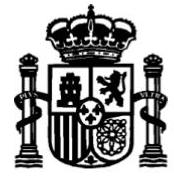

MINISTERIO
DE ASUNTOS ECONÓMICOS
Y TRANSFORMACIÓN DIGITAL

SCRETAÑÍA DE ESTADO DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL
DIRECCIÓN GENERAL DE DIGITALIZACIÓN E INTELIGENCIA ARTIFICIAL SUBDIRECCIÓN GENERAL DE INTELIGENCIA ARTIFICIAL Y TECNOLOGÍAS HABILITADORAS DIGITALES

Podrá participar cualquier proveedor o proveedor prospectivo que cumpla los criterios y resulte elegido. La Comisión puede regular mediante actos de ejecución los procedimientos de planteamiento y ejecución, incluyendo elegibilidad, solicitud, selección, participación, seguimiento y salida.

La participación en un sandbox tendrá un límite temporal en función de la escala del proyecto. Se basará en un plan específico; si los participantes lo respetan y siguen la guía de las autoridades, estarán exentos de sanciones administrativas por infracciones legales relativas al sistema supervisado en el sandbox. No se limita los poderes de supervisión de cada autoridad, ni la responsabilidad de los participantes ante daños causados en su participación.

Dentro del sandbox, y cumpliendo las condiciones que se establecen, se podrán tratar datos personales obtenidos para otros propósitos si son imprescindibles para el desarrollo de sistemas de un interés público sustancial (en salud, medio ambiente, sostenibilidad energética, movilidad, calidad del servicio público y seguridad de infraestructuras críticas).

Las autoridades nacionales acordarán con los participantes las condiciones de prueba en condiciones reales, asegurando el respeto a la seguridad, salud y derechos fundamentales. El Reglamento establece términos y limitaciones, que incluyen entre otros la aprobación previa y registro del plan de pruebas del participante, el consentimiento de los afectados y la reversibilidad de las decisiones tomadas.

Los participantes recibirán prueba de las actividades realizadas y un informe de salida que puede ser valorado por organismos notificados en la evaluación de conformidad. Los informes de salida, si los participantes acceden, estarán disponibles para la Comisión Europea, incluso al público si así se acuerda.

Las autoridades nacionales elaborarán informes públicos anuales sobre los sandboxes que implementen. Incluirán conclusiones alcanzadas, recomendaciones y buenas prácticas, que el Comité Europeo de IA compilará y publicará en la plataforma electrónica unificada.

Se consideran medidas para PYMEs, incluyendo start-ups. Estas medidas incluyen formación adaptada sobre el Reglamento, canales específicos de comunicación, apoyo para el cumplimiento del Reglamento, publicación de información y mejores prácticas, etc. Las microempresas no están obligadas a mantener un sistema de gestión de calidad (pero sí de riesgos).

# Título VI - Gobernanza 

## Capítulo 1 - Comité Europeo de Inteligencia Artificial

Se establece el Comité Europeo de IA, con un representante de cada EEMM. El Supervisor Europeo de Protección de Datos será observador y la Comisión participará sin voto. Contará con la asesoría de un grupo permanente de representación de interesados, que incluirá proveedores, usuarios, entidades notificadas, organizaciones civiles, etc.

Las tareas del Comité incluyen:

- Recolectar conocimiento técnico y regulatorio y mejores prácticas entre los EEMM.
- Cooperar en la armonización de las pruebas de conformidad, del funcionamiento de los sandboxes y de las pruebas en condiciones reales.
- Cooperar con organizaciones de expertos en servicios digitales, servicios financieros, competencia, seguridad de productos, ciberseguridad, protección de datos, protección de derechos, criptomonedas.
- Publicar recomendaciones sobre especificaciones, estándares y guías.
- Aconsejar a la Comisión cuando defina líneas maestras para implantar el Reglamento.

- Aconsejar a la Comisión cuando prepare actos de ejecución o delegados.
- Aconsejar a la Comisión en materias internacionales relativas a IA.
- Aconsejar a las autoridades nacionales de supervisión de mercado en materia de IA.
- Contribuir a la evaluación de necesidades formativas de los EEMM.


# Capítulo 2 - Autoridades nacionales competentes 

Cada EEMM designará una autoridad notificadora y al menos una autoridad de supervisión de mercado en relación con el Reglamento de IA. Serán objetivas e imparciales. Estarán dotadas de los recursos adecuados. Intercambiarán experiencia entre ellas. Estarán supervisadas por el Supervisor Europeo de Protección de Datos. Pueden coincidir en el mismo organismo.

## Título VII - Base de datos de la UE sobre HRAIS del anexo III

La Comisión establecerá, con el consejo del Comité Europeo de Inteligencia Artificial, una base de datos para registrar los HRAIS del anexo III que se pongan en marcha y de los que están siendo probados. De los primeros, la información será accesible al público.

## Título VIII - Monitorización post-comercialización, compartición de información y supervisión de mercado.

Capítulo 1 - Monitorización post-comercialización.
Los proveedores de sistemas de alto riesgo pondrán en marcha un sistema de monitorización post-comercialización apropiado a los riesgos detectados. Se recogerán los datos necesarios para permitir el cumplimiento de los requisitos impuestos a los HRAIS en el Título III, Cap. 2. El sistema se basará en un plan documentado que se ajuste al esquema que proponga la Comisión.

## Capítulo 2 - Compartición de información sobre incidentes serios

Los proveedores informarán de cualquier incidente a las autoridades de supervisión de mercado y estas a su vez a otras autoridades encargadas de la protección de derechos fundamentales.

## Capítulo 3 - Imposición

Las autoridades de supervisión de mercado informarán a la Comisión de las actividades realizadas en relación con el Reglamento.

Los HRAIS que lo son en virtud de normativa armonizada tendrán como autoridad supervisora de mercado la que indique esa normativa.

Para los HRAIS usados por instituciones financieras, será el supervisor financiero.
Para HRAIS para biometría usada por fuerzas y cuerpos de seguridad, el supervisor será la autoridad que supervise este tipo de actividades o en su lugar la agencia de protección de datos.

Cuando instituciones de la Unión caigan en el ámbito del Reglamento, serán supervisadas por el Supervisor Europeo de Protección de Datos.

Los EEMM deben facilitar la coordinación entre las autoridades nacionales de supervisión de mercado, incluyendo las designadas en virtud de este reglamento y las que supervisen la aplicación de normativa armonizada.

Si es necesario, las autoridades de supervisión de mercado tendrán acceso a los datos usados para entrenamiento, validación y testeo a través de APIs. También al código si es necesario para evaluar si el HRAIS cumple los requisitos del Reglamento o si otros métodos han sido insuficientes para verificar el cumplimiento.

Las autoridades de supervisión de mercado tendrán competencia y poderes para asegurar que las pruebas en condiciones reales sean conformes con el Reglamento. Puede otorgar o denegar el permiso de realizar las pruebas, y ante incidentes serios, exigir modificaciones al proveedor, suspenderlas o terminarlas.

Las autoridades nacionales que supervisen o impongan obligaciones que protejan derechos fundamentales, cuando ejerzan sus competencias en relación con el uso de HRAIS, podrán acceder a la documentación generada al abrigo de este Reglamento. Habrá que notificar a la Comisión cuáles son esas autoridades. Si esa documentación resulta insuficiente, pueden solicitar a la autoridad de supervisión de mercado que organice pruebas específicas.

Si una autoridad de supervisión de mercado considera que un sistema presenta riesgos, puede evaluarlo, y si descubre que no cumple el Reglamento, puede requerir al proveedor acciones correctivas. Si el no cumplimiento es transnacional, informará a la Comisión y a otros EEMM. Si el proveedor no toma acciones correctivas, la autoridad puede tomar medidas para prohibir o restringir el HRAIS. El Reglamento describe cómo se aplican estas medidas, en particular en casos transnacionales, y procedimientos para dirimir desacuerdos entre EEMM.

Las autoridades también pueden, sobre HRAIS o GPAIS que cumplen con requisitos pero podrían entrañar riesgo, o que no demuestran adecuadamente la conformidad, exigir medidas a los proveedores o incluso retirar el sistema.

Se crearán centros de pruebas de la Unión y se creará un banco de expertos independientes para dar apoyo al cumplimiento de actividades bajo este Reglamento. Estos expertos serán técnicos o científicos de la IA y podrán dar consejo a las autoridades de supervisión, apoyar investigaciones transnacionales de mercado o apoyar a la Comisión en sus actividades.

# Título IX - Códigos de conducta 

Comisión y Estados Miembros apoyarán la redacción de códigos de conducta para fomentar la aplicación voluntaria de algunos de los requisitos del Reglamento para los HRAIS a sistemas IA que no sean de alto riesgo, o la aplicación voluntaria a cualquier sistema de otros requisitos como sostenibilidad medioambiental o accesibilidad. Estos códigos de conducta podrán redactarlos empresas o sociedad civil, entre otros agentes.

## Título X - Confidencialidad y sanciones

Cualquier persona física o jurídica relacionada con la aplicación del Reglamento ha de asegurar la confidencialidad de los datos que obtenga como resultado de esas actividades.

No se revelará información intercambiada entre autoridades nacionales y la Comisión sin previa consulta con la autoridad de origen cuando la información provenga de sistemas usados en actividades de orden público, control fronterizo, inmigración o asilo. No es obligatorio el intercambio de datos operativos sobre estas actividades. Los proveedores serán quienes custodien la documentación de estos sistemas y proporcionen copias a agentes autorizados de las autoridades de supervisión.

Sanciones. Se modularán según las circunstancias y valorarán el tamaño del proveedor.

- Hasta 30M€, o 6\% del volumen anual de negocio para empresas (3\% si son PYMEs) por incumplir las prohibiciones del Reglamento.
- Hasta 20M€, o 4\% del volumen anual de negocio (2\% para PYMEs) por incumplir las obligaciones del Reglamento a proveedores, importadores, distribuidores, usuarios.
- Hasta 10M€, o 2\% del volumen anual de negocio (1\% para PYMEs) por suministrar información incorrecta a entidades notificadas o autoridades nacionales competentes.
- Hasta 500K€ a entidades de la Unión por incumplimiento de prohibiciones o 250K€ por incumplimiento de obligaciones.


# Título XI - Delegación de poderes 

La Comisión tiene delegados los poderes de:

- Enmendar a la lista de tipos de sistema que se consideran HRAIS en el Anexo III.
- Asegurar que la documentación exigida sea suficiente para asegurar la conformidad de los sistemas con el Reglamento, a la vista del progreso técnico.
- Enmendar el Anexo VI (valoración de conformidad mediante control interno) y el Anexo VII (valoración de conformidad mediante valoración del sistema de control de calidad y la documentación) para adecuarlos al progreso técnico.
- Requerir que ciertos HRAIS para los que el Reglamento autoriza demostrar conformidad mediante control interno, se vean sujetos a pruebas de conformidad por entidad notificada.
- Enmendar el Anexo V (contenidos de la declaración de conformidad) para adecuarlo al progreso técnico.


## Título XII - Disposiciones finales

Este título fundamentalmente enmienda otras disposiciones para adecuarlas al Reglamento.
También establece esta agenda:

- El Reglamento se aplicará completamente a los tres años de su publicación en el DOUE.
- A los 12 meses de su publicación entrará en vigor lo referente a autoridades notificantes, autoridades nacionales de supervisión, y Comité Europeo de IA (Tit.III Cap. 4 y Tit.VI).
- Cada 2 años, la Comisión revisará la necesidad de enmienda del Anexo III.
- Cada cuatro años, informará al Parlamento y el Consejo sobre la aplicación del Reglamento, valorando recursos técnicos y humanos disponibles y sanciones aplicadas.
- Cada cuatro años, la Comisión evaluará la efectividad de los códigos de conducta.

In [11]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in pdf_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

display(Markdown(get_combined_markdown(pdf_response)))

In [12]:
# Guardar només el text en un fitxer .txt
text_content = "\n\n".join([page.markdown for page in pdf_response.pages])

with open("document.txt", "w", encoding="utf-8") as f:
    f.write(text_content)

# Guardar en un fitxer .md amb imatges en base64
markdown_content = get_combined_markdown(pdf_response)

with open("document.md", "w", encoding="utf-8") as f:
    f.write(markdown_content)

print("Fitxers guardats: document.txt i document.md")


Fitxers guardats: document.txt i document.md
